In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Set CUDA_VISIBLE_DEVICES to an empty string

2024-04-06 02:07:42.068440: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 02:07:42.068576: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 02:07:42.068659: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-06 02:07:42.111358: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 02:07:44.925998: W tensorflow/compiler/

## Load Dataset

In [2]:
TRAIN_DIR_NEW = 'SFEW/Train'
VAL_DIR_NEW = 'SFEW/Val'

## Create dataframe from dataset folder of images

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

## Dataframe of train and test model

In [4]:
train_new = pd.DataFrame()
train_new['image'], train_new['label'] = createdataframe(TRAIN_DIR_NEW)

Sad completed
Neutral completed
Surprise completed
Happy completed
Fear completed
Angry completed
Disgust completed


In [5]:
val_new = pd.DataFrame()
val_new['image'], val_new['label'] = createdataframe(VAL_DIR_NEW)

Sad completed
Neutral completed
Surprise completed
Happy completed
Fear completed
Angry completed
Disgust completed


In [6]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 720, 576, 3)
    return features

In [7]:
train_features_new = extract_features(train_new['image'])

In [8]:
val_features_new = extract_features(val_new['image'])

### Devide train and test feature with highest value of pixals

In [9]:
x_train_new = train_features_new / 255.0
x_val_new = val_features_new / 255.0

### Encoding Label to numerical formet

In [10]:
le = LabelEncoder()
le.fit(train_new['label'])
le.fit(val_new['label'])

LabelEncoder()

In [11]:
y_train_new = le.transform(train_new['label'])
y_val_new = le.transform(val_new['label'])

In [12]:
y_train_new = to_categorical(y_train_new, num_classes=7)
y_val_new = to_categorical(y_val_new, num_classes=7)

## Convolutional neural network (CNN) model

In [17]:
# CNN model architecture
model_new = Sequential()
model_new.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(720, 576, 3)))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Dropout(0.4))
model_new.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Dropout(0.4))
model_new.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Dropout(0.4))
model_new.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Dropout(0.4))
model_new.add(Flatten())
model_new.add(Dense(256, activation='relu'))
model_new.add(Dropout(0.4))
model_new.add(Dense(128, activation='relu'))
model_new.add(Dropout(0.3))
model_new.add(Dense(7, activation='softmax'))

# Compile the model
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model and evalute with test dataset

In [18]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = 'CNN_model_checkpoint.h5'

# Check if the checkpoint file exists
if os.path.exists(checkpoint_filepath):
    # Load the model weights
    model_new.load_weights(checkpoint_filepath)
    print("Model weights loaded successfully!")

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
# Train the model
history = model_new.fit(x=x_train_new, y=y_train_new, batch_size=32, epochs=37, validation_data=(x_val_new, y_val_new), callbacks=[checkpoint_callback])

Model weights loaded successfully!
Epoch 1/37
30/30 [==============================] - 223s 7s/step - loss: 1.8536 - accuracy: 0.2484 - val_loss: 1.9456 - val_accuracy: 0.1766
Epoch 2/37
30/30 [==============================] - 215s 7s/step - loss: 1.8467 - accuracy: 0.2401 - val_loss: 1.9150 - val_accuracy: 0.1720
Epoch 3/37
30/30 [==============================] - 215s 7s/step - loss: 1.8004 - accuracy: 0.2693 - val_loss: 1.8965 - val_accuracy: 0.1766
Epoch 4/37
30/30 [==============================] - 216s 7s/step - loss: 1.7943 - accuracy: 0.2683 - val_loss: 1.9599 - val_accuracy: 0.1651
Epoch 5/37
30/30 [==============================] - 215s 7s/step - loss: 1.7649 - accuracy: 0.2871 - val_loss: 1.9857 - val_accuracy: 0.1674
Epoch 6/37
30/30 [==============================] - 216s 7s/step - loss: 1.7141 - accuracy: 0.3372 - val_loss: 2.0393 - val_accuracy: 0.1674
Epoch 7/37
30/30 [==============================] - 216s 7s/step - loss: 1.6696 - accuracy: 0.3559 - val_loss: 2.0503 -

NameError: name 'model' is not defined

## Test accuracy on test dataset

14/14 [==============================] - 13s 911ms/step - loss: 4.7124 - accuracy: 0.1537
Test Loss: 4.712351322174072
Test Accuracy: 0.15366972982883453


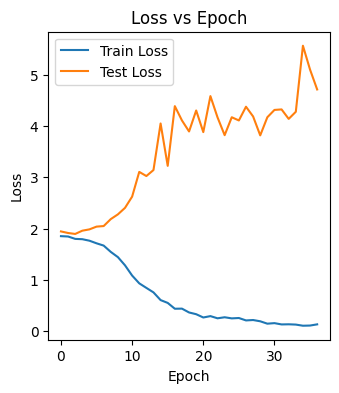

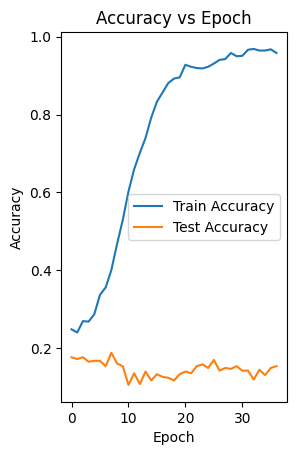

In [19]:
loss, accuracy = model_new.evaluate(x_val_new, y_val_new)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 4))

# Plot loss vs epoch for both train and test
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy vs epoch for both train and test
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the model

In [22]:
model_json = model_new.to_json()
with open("CNN_model-SFEW.json",'w') as json_file:
    json_file.write(model_json)
model_new.save("CNN_model-SFEW.h5")

/home/preet7/jupyter1/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
